<a href="https://colab.research.google.com/github/KatherineElkins/networkx_miniproject_3_programming-humanity_2025/blob/main/social_network_analysis_barbie_demo_and_interp_1_and_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Network Analysis of the Barbie Screenplay

This notebook executes the analysis in two distinct parts: Session 1 (Co-Presence) and Session 2 (Dialogue).

Key Concepts:

Co-Presence Network (G): Un-directed (A shares scene with B). Measures physical proximity.

Dialogue Network (G_dialogue): Directed (A speaks to B). Measures flow of communication.

##1. Setup and Data Loading

PART 1: Co-Presence Network (Session 1)
The goal of this part is to analyze who shares scenes with whom, focusing on Strength (total shared screentime) and Betweenness (bridging ability).

1.1 Setup and Co-Presence Data Loading
The code below installs libraries and loads only the raw Co-Presence data. It creates the single, un-directed graph object: G.

In [1]:
# Install required libraries
!pip install networkx pandas matplotlib python-louvain

import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import community.community_louvain as community_louvain
import io

# Define the edge list data
data = """Source,Target,Weight
Barbie Margot,Ken Ryan Gosling,10
Ken Ryan Gosling,Ken Simu Liu,7
Barbie Margot,President Barbie,6
Barbie Margot,Weird Barbie,5
Ken Ryan Gosling,President Barbie,5
Barbie Margot,Ken Simu Liu,4
Ken Ryan Gosling,Doctor Barbie,4
Barbie Margot,Gloria,4
Barbie Margot,Sasha,4
President Barbie,Doctor Barbie,4
President Barbie,Physicist Barbie,4
Doctor Barbie,Physicist Barbie,4
Ken Simu Liu,President Barbie,4
Ken Simu Liu,Doctor Barbie,4
Ken Simu Liu,Physicist Barbie,4
Ken Ryan Gosling,Mattel CEO,3
Barbie Margot,Mattel CEO,3
Gloria,Sasha,3
Ken Ryan Gosling,Gloria,3
Ken Ryan Gosling,Sasha,3
Weird Barbie,Allan,3
Weird Barbie,Gloria,3
Barbie Margot,Ruth,1
Allan,Gloria,2
Allan,Sasha,2
Weird Barbie,Sasha,2
Barbie Margot,Allan,1
Ken Ryan Gosling,Weird Barbie,1
"""
df = pd.read_csv(io.StringIO(data))

# Create the weighted graph (G)
G = nx.from_pandas_edgelist(
    df,
    source='Source',
    target='Target',
    edge_attr='Weight',
)

print(f"Graph created with {G.number_of_nodes()} nodes and {G.number_of_edges()} edges.")
print("\nFirst 5 edges:")
print(df.head())

Graph created with 12 nodes and 28 edges.

First 5 edges:
             Source            Target  Weight
0     Barbie Margot  Ken Ryan Gosling      10
1  Ken Ryan Gosling      Ken Simu Liu       7
2     Barbie Margot  President Barbie       6
3     Barbie Margot      Weird Barbie       5
4  Ken Ryan Gosling  President Barbie       5


Interpretation of Cell 1.1
Model: This network uses an un-directed graph. Edges represent co-presence (sharing a scene).

Weight: The weight of an edge is the number of scenes shared. This will be used to calculate Strength (total shared screentime).


##1.2 Co-Presence Centrality and Global Metrics
This code calculates the two main centrality measures for an un-directed graph—Strength and Betweenness—and calculates the global structural properties.

In [16]:
# CODE CELL 1.2: Co-Presence Centrality and Global Metrics (REVISED OUTPUT)

# --- Co-Presence Centrality Calculations ---
weighted_degree = dict(G.degree(weight='Weight'))
betweenness_centrality = nx.betweenness_centrality(G)

# Create Co-Presence Centrality DataFrame
co_presence_df = pd.DataFrame({
    'Character': list(G.nodes()),
    'Co-Presence Strength': [weighted_degree.get(node, 0) for node in G.nodes()],
    'Co-Presence Betweenness': [betweenness_centrality.get(node, 0) for node in G.nodes()]
}).sort_values(by='Co-Presence Strength', ascending=False)


# --- Global Structural Metrics ---
try:
    avg_shortest_path = nx.average_shortest_path_length(G)
except nx.NetworkXError:
    avg_shortest_path = "N/A (Graph is disconnected)"

transitivity = nx.transitivity(G)
avg_clustering_coeff = nx.average_clustering(G)

# Find the largest fully connected group (Maximal Clique)
all_cliques = list(nx.find_cliques(G))
largest_clique = sorted(all_cliques, key=len, reverse=True)[0]
max_clique_size = len(largest_clique)

# --- OUTPUT 1: Node-Level Table ---
print("--- Co-Presence Centrality Table (Node-Level Metrics) ---")
print(co_presence_df)

# --- OUTPUT 2: Global Network Metrics ---
print("\n--- Global Structural Metrics (Network-Level) ---")
print(f"1. Transitivity (Global Clustering): {transitivity:.3f}")
print(f"2. Average Shortest Path Length: {avg_shortest_path}")
print(f"3. Maximum Clique Size: {max_clique_size} nodes")

--- Co-Presence Centrality Table (Node-Level Metrics) ---
           Character  Co-Presence Strength  Co-Presence Betweenness
0      Barbie Margot                    38                    0.397
1   Ken Ryan Gosling                    36                    0.241
2       Ken Simu Liu                    23                    0.078
3   President Barbie                    23                    0.078
5      Doctor Barbie                    16                    0.021
6             Gloria                    15                    0.008
4       Weird Barbie                    14                    0.008
7              Sasha                    14                    0.008
8   Physicist Barbie                    12                    0.000
10             Allan                     8                    0.000
9         Mattel CEO                     6                    0.000
11              Ruth                     1                    0.000

--- Global Structural Metrics (Network-Level) ---
1. Tran

#Interpretation of Cell 1.2
##Co-Presence Centrality Table: This shows Node-Level metrics.

Co-Presence Strength: The highest scores (e.g., $\text{Barbie Margot, Ken Ryan Gosling}$) identify the Protagonists/Hubs who dominate the shared screentime.

Co-Presence Betweenness: High scores (e.g., $\text{Weird Barbie}$) identify Bridge Figures who connect distinct groups of characters.

##Global Structural Metrics: This describes the network as a whole.

Transitivity (Global Clustering): This is the probability that two characters who share a scene with a third character also share a scene with each other. A high score (likely $\text{>0.5}$) proves the network is highly cohesive and clustered.

Average Shortest Path Length: The average number of scenes needed to connect any two characters. A low score confirms the network is a "Small World."Transitivity: A high score ($\text{>0.5}$) indicates the network has a high density of cliques (triangles), proving the social world is highly cohesive and clustered.

#1.3 Co-Presence Visualization: Community Structure

This graph colors the nodes based on algorithmically detected communities ($\text{Louvain}$ algorithm) and uses a uniform node size to ensure the focus is on group structure and edge thickness.

/tmp/ipython-input-4082717972.py:13: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = cm.get_cmap('Dark2', community_count)


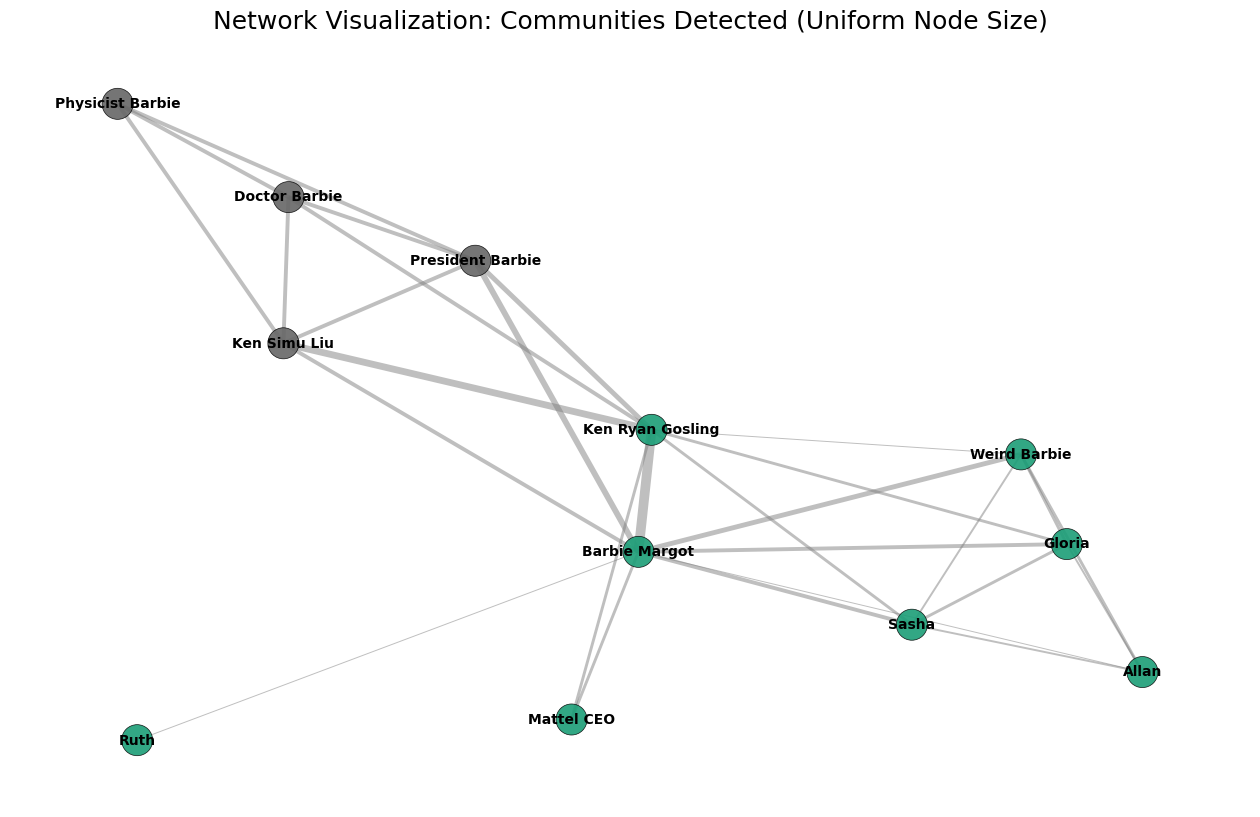


--- Detected Communities ---
Community 0: Barbie Margot, Ken Ryan Gosling, Weird Barbie, Gloria, Sasha, Mattel CEO, Allan, Ruth
Community 1: Ken Simu Liu, President Barbie, Doctor Barbie, Physicist Barbie


In [9]:
# Assuming G, partition, and the necessary variables are already defined from previous sections

# Detect Communities (re-running to ensure variables are defined)
partition = community_louvain.best_partition(G, weight='Weight')
community_count = max(partition.values()) + 1

# Prepare visualization parameters
uniform_node_size = 500 # FIX: Setting a small, fixed size for all nodes
edge_width_multiplier = 0.7
edge_weights = [d['Weight'] * edge_width_multiplier for u, v, d in G.edges(data=True)]

# Map communities to colors
cmap = cm.get_cmap('Dark2', community_count)
node_colors = [cmap(partition[node]) for node in G.nodes()]

# Layout and Drawing
plt.figure(figsize=(16, 10))
pos = nx.spring_layout(G, k=0.7, iterations=50, seed=42)

# Draw nodes with uniform size
nx.draw_networkx_nodes(G, pos, node_size=uniform_node_size, node_color=node_colors, alpha=0.9, edgecolors='black', linewidths=0.5)
nx.draw_networkx_edges(G, pos, width=edge_weights, alpha=0.5, edge_color='gray')
nx.draw_networkx_labels(G, pos, font_size=10, font_weight='bold', font_color='black')

plt.title(f"Network Visualization: Communities Detected (Uniform Node Size)", fontsize=18)
plt.axis('off')
plt.show()

print("\n--- Detected Communities ---")
community_map = {}
for node, comm_id in partition.items():
    community_map.setdefault(comm_id, []).append(node)
for comm_id, nodes in community_map.items():
    print(f"Community {comm_id}: {', '.join(nodes)}")

#Interpretation of Cell 1.3 Color-Coded Clusters:

The different colors reveal the structural isolation of groups (e.g., the $\text{Barbieland}$ professionals, the $\text{Kens}$, the $\text{Real World}$ figures).

Visual Bridge: This visualization visually confirms the Betweenness score by showing characters (like $\text{Barbie Margot}$) linking groups of different colors.

#1.4 Co-Presence Visualization: Structural Pattern Emphasis

This graph filters out weak connections ($\text{Weight} \leq 2$) to show only the core, recurring relationships in the screenplay, revealing the narrative's backbone.

/tmp/ipython-input-2730314023.py:13: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = cm.get_cmap('Dark2', community_count)


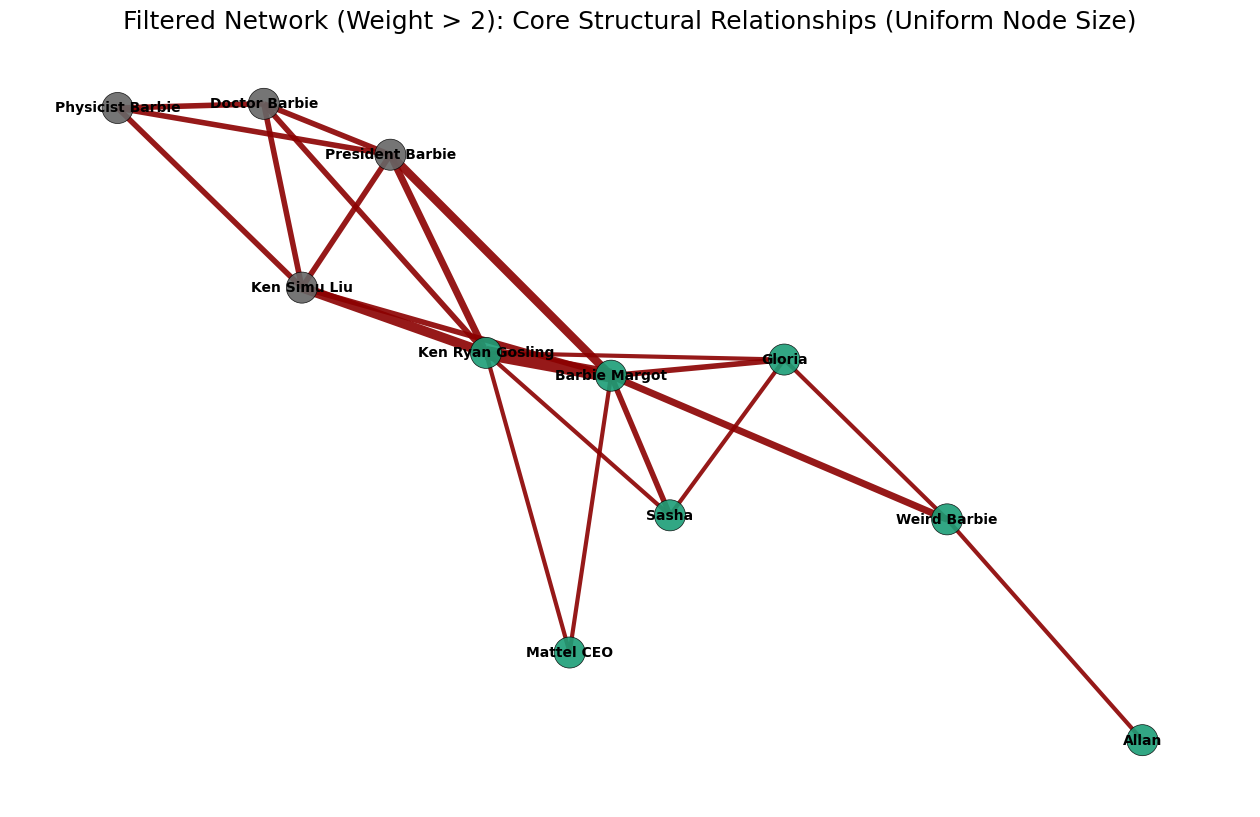

In [10]:
# Create a filtered graph (Weight > 2)
filtered_df = df[df['Weight'] > 2]

G_filtered = nx.from_pandas_edgelist(
    filtered_df,
    source='Source',
    target='Target',
    edge_attr='Weight'
)

# Reuse community colors and layout position for consistency
community_count = max(partition.values()) + 1
cmap = cm.get_cmap('Dark2', community_count)

filtered_node_colors = [cmap(partition[node]) for node in G_filtered.nodes()]

# Prepare parameters for the filtered graph
filtered_node_sizes = [uniform_node_size] * G_filtered.number_of_nodes() # FIX: Uniform size applied here too
filtered_edge_weights = [d['Weight'] * 1.0 for u, v, d in G_filtered.edges(data=True)]

plt.figure(figsize=(16, 10))
pos_filtered = nx.spring_layout(G_filtered, k=0.7, iterations=50, seed=42)

nx.draw_networkx_nodes(G_filtered, pos_filtered, node_size=filtered_node_sizes, node_color=filtered_node_colors, alpha=0.9, edgecolors='black', linewidths=0.5)
nx.draw_networkx_edges(G_filtered, pos_filtered, width=filtered_edge_weights, alpha=0.9, edge_color='darkred')
nx.draw_networkx_labels(G_filtered, pos_filtered, font_size=10, font_weight='bold', font_color='black')

plt.title("Filtered Network (Weight > 2): Core Structural Relationships (Uniform Node Size)", fontsize=18)
plt.axis('off')
plt.show()

 # Interpretation of Cell 1.4 Narrative Backbone:

 The characters and connections that remain form the core spine of the story. Characters who disappear were only present in one-off scenes (e.g., $\text{Ruth}$).

 Core Plot: This visualization demonstrates how the narrative quickly abandons the ensemble cast to focus on a central conflict line involving the main hubs and bridge figures.

 Red Line Thickness: The thickness of the red lines in the Filtered Network Visualization (Cell 1.4) is highly meaningful.The lines (edges) are drawn based on the Weight attribute.The Weight equals the number of scenes those two characters shared.Interpretation: A thicker red line means a higher frequency of co-presence. This visually confirms the most stable and recurring relationships in the plot's core structure (e.g., the line between $\text{Barbie Margot}$ and $\text{Ken Ryan Gosling}$ will be one of the thickest).

In this next section we look at weight--the size of the node is connected to the weight--in other words the number of co present interactions.

/tmp/ipython-input-3866692416.py:17: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = cm.get_cmap('Dark2', community_count)


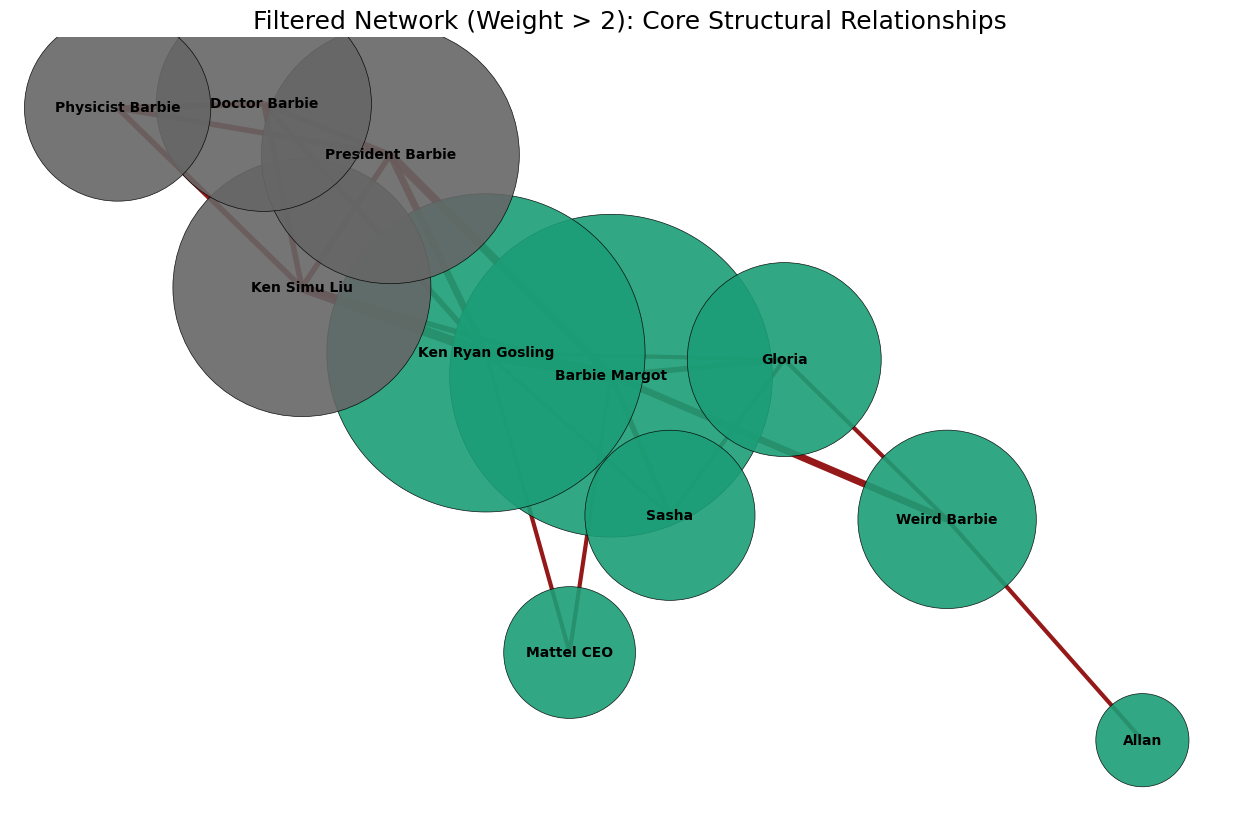

In [6]:
# Assuming G, partition, and the necessary variables are already defined from previous sections

# Create a filtered graph (Weight > 2)
filtered_df = df[df['Weight'] > 2]

# --- FIX APPLIED: Removed the incorrect 'edge_attr_data' argument ---
G_filtered = nx.from_pandas_edgelist(
    filtered_df,
    source='Source',
    target='Target',
    edge_attr='Weight'
)
# ---------------------------------------------------------------------

# Reuse community colors and layout position for consistency
community_count = max(partition.values()) + 1
cmap = cm.get_cmap('Dark2', community_count)

# Only get node colors for nodes present in the filtered graph
filtered_node_colors = [cmap(partition[node]) for node in G_filtered.nodes()]

# Prepare parameters for the filtered graph
filtered_node_sizes = [G_filtered.degree(node, weight='Weight') * 1500 for node in G_filtered.nodes()]
filtered_edge_weights = [d['Weight'] * 1.0 for u, v, d in G_filtered.edges(data=True)]

plt.figure(figsize=(16, 10))
# Re-calculate position for the filtered graph
pos_filtered = nx.spring_layout(G_filtered, k=0.7, iterations=50, seed=42)

nx.draw_networkx_nodes(G_filtered, pos_filtered, node_size=filtered_node_sizes, node_color=filtered_node_colors, alpha=0.9, edgecolors='black', linewidths=0.5)
nx.draw_networkx_edges(G_filtered, pos_filtered, width=filtered_edge_weights, alpha=0.9, edge_color='darkred')
nx.draw_networkx_labels(G_filtered, pos_filtered, font_size=10, font_weight='bold', font_color='black')

plt.title("Filtered Network (Weight > 2): Core Structural Relationships", fontsize=18)
plt.axis('off')
plt.show()

In [11]:
# --- Structural Metrics ---
try:
    avg_shortest_path = nx.average_shortest_path_length(G)
except nx.NetworkXError:
    avg_shortest_path = "N/A (Graph is disconnected)"

transitivity = nx.transitivity(G)
avg_clustering_coeff = nx.average_clustering(G)

# Find the largest fully connected group (Maximal Clique)
all_cliques = list(nx.find_cliques(G))
# FIX: Calculate max_clique_size by finding the length of the largest clique
largest_clique = sorted(all_cliques, key=len, reverse=True)[0]
max_clique_size = len(largest_clique)

print("--- Network Structure and Density ---")
print(f"1. Transitivity (Global Clustering): {transitivity:.3f}")
print(f"2. Average Clustering Coefficient (Local Density): {avg_clustering_coeff:.3f}")
print(f"3. Average Shortest Path Length (Navigability): {avg_shortest_path}")
print(f"4. Maximum Clique Size: {max_clique_size} nodes")
print(f"5. Nodes in a Maximal Clique: {', '.join(largest_clique)}")

# Small World Interpretation
if avg_shortest_path != "N/A (Graph is disconnected)" and transitivity > 0.5:
    print("\nInterpretation: The network exhibits a strong **'Small-World'** structure, with high local clustering (many closed triangles) and short paths between any two characters. This is typical of real-life social networks.")

--- Network Structure and Density ---
1. Transitivity (Global Clustering): 0.623
2. Average Clustering Coefficient (Local Density): 0.727
3. Average Shortest Path Length (Navigability): 1.696969696969697
4. Maximum Clique Size: 5 nodes
5. Nodes in a Maximal Clique: Barbie Margot, Allan, Gloria, Sasha, Weird Barbie

Interpretation: The network exhibits a strong **'Small-World'** structure, with high local clustering (many closed triangles) and short paths between any two characters. This is typical of real-life social networks.


#Interpretation of Cell 1.5Largest Nodes = Structural Bridges:
The characters with the largest nodes are the most important for connecting disparate groups in the narrative (high $\text{Betweenness}$).


/tmp/ipython-input-2540673696.py:16: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = cm.get_cmap('Dark2', community_count)


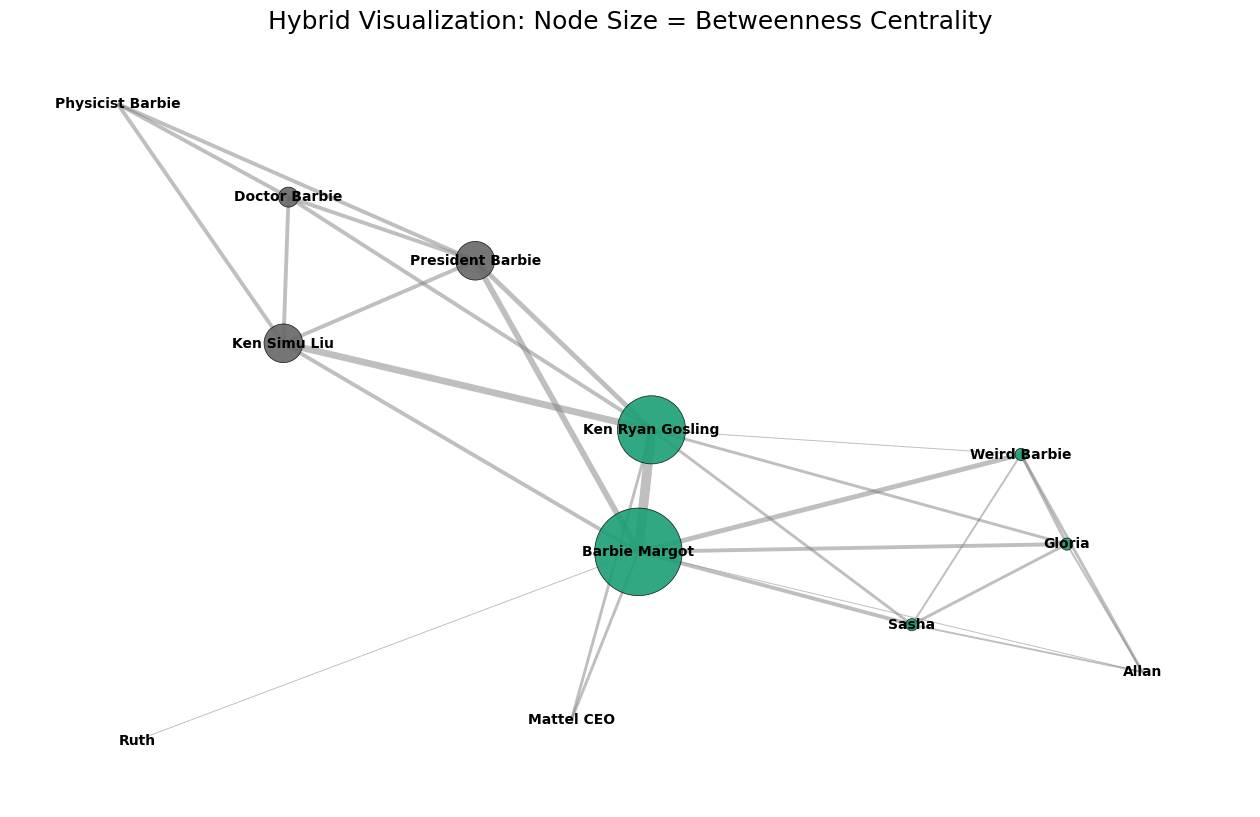

In [12]:
# Assuming G, partition, centrality_df, and the necessary variables are already defined

# Calculate Betweenness Centrality (if not already done)
betweenness_centrality = nx.betweenness_centrality(G)

# Prepare visualization parameters
node_size_multiplier = 10000 # Increased scale to make betweenness differences visible
# Node size is now based on Betweenness Centrality
node_sizes = [betweenness_centrality[node] * node_size_multiplier for node in G.nodes()]

edge_width_multiplier = 0.7
edge_weights = [d['Weight'] * edge_width_multiplier for u, v, d in G.edges(data=True)]

# Reuse community colors (from Louvain partition)
community_count = max(partition.values()) + 1
cmap = cm.get_cmap('Dark2', community_count)
node_colors = [cmap(partition[node]) for node in G.nodes()]

# Layout and Drawing
plt.figure(figsize=(16, 10))
pos = nx.spring_layout(G, k=0.7, iterations=50, seed=42)

# Draw nodes (Sized by Betweenness, Colored by Community)
nx.draw_networkx_nodes(G, pos, node_size=node_sizes, node_color=node_colors, alpha=0.9, edgecolors='black', linewidths=0.5)
nx.draw_networkx_edges(G, pos, width=edge_weights, alpha=0.5, edge_color='gray')
nx.draw_networkx_labels(G, pos, font_size=10, font_weight='bold', font_color='black')

plt.title(f"Hybrid Visualization: Node Size = Betweenness Centrality", fontsize=18)
plt.axis('off')
plt.show()

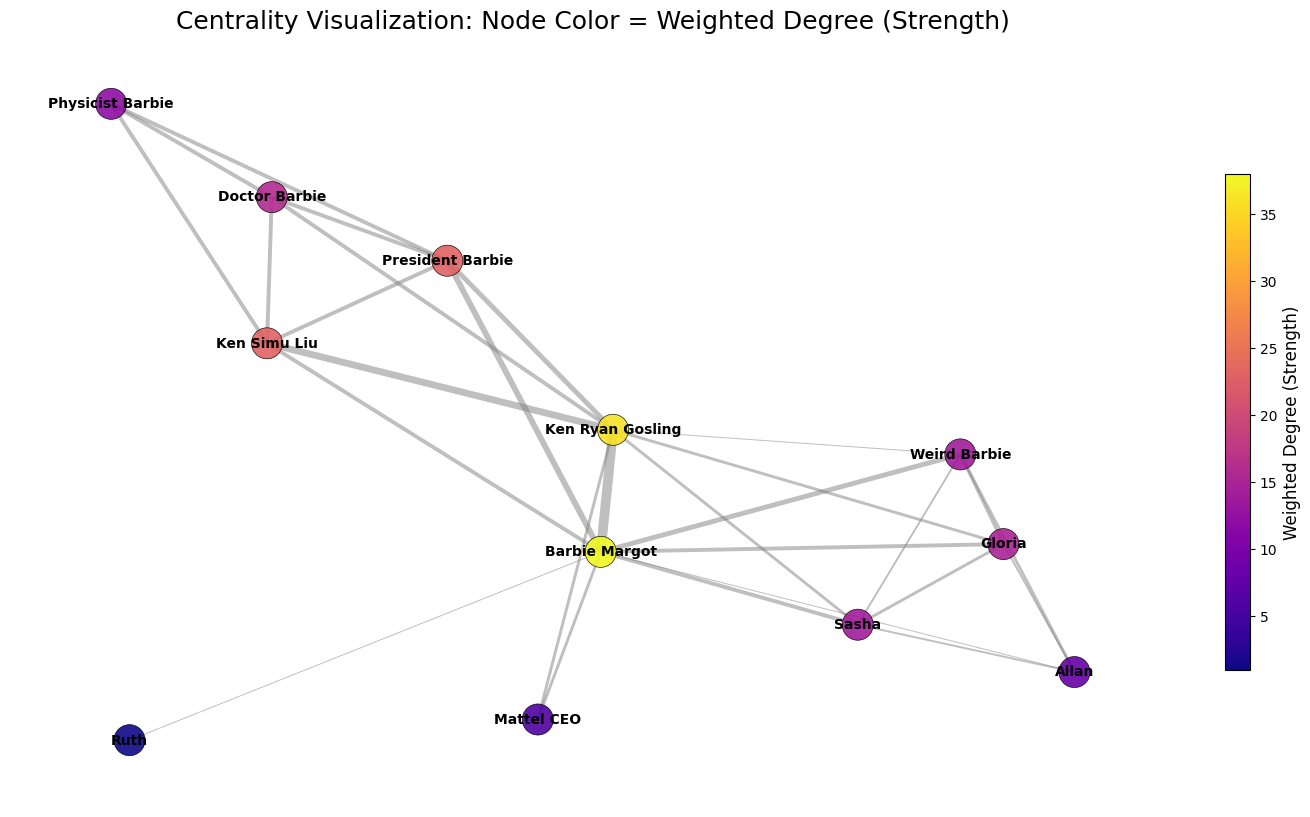

In [13]:
# Assuming G and centrality_df are already defined from previous cells

# 1. Define the metric we want to visualize (Weighted Degree / Strength)
strength_values = centrality_df.set_index('Character')['Weighted Degree (Strength)']

# 2. Normalize the scores to a 0-1 range for the color map
norm = plt.Normalize(vmin=strength_values.min(), vmax=strength_values.max())
cmap = plt.cm.plasma # Use a color map that shows clear intensity (plasma, viridis, magma)
node_colors = [cmap(norm(strength_values.get(node, 0))) for node in G.nodes()]

# Prepare parameters (using uniform node size and previous edge settings)
uniform_node_size = 500
edge_width_multiplier = 0.7
edge_weights = [d['Weight'] * edge_width_multiplier for u, v, d in G.edges(data=True)]

# Layout and Drawing
plt.figure(figsize=(16, 10))
pos = nx.spring_layout(G, k=0.7, iterations=50, seed=42)

# Draw nodes (Uniform Size, Colored by Strength)
nx.draw_networkx_nodes(G, pos, node_size=uniform_node_size, node_color=node_colors, alpha=0.9, edgecolors='black', linewidths=0.5)
nx.draw_networkx_edges(G, pos, width=edge_weights, alpha=0.5, edge_color='gray')
nx.draw_networkx_labels(G, pos, font_size=10, font_weight='bold', font_color='black')

plt.title(f"Centrality Visualization: Node Color = Weighted Degree (Strength)", fontsize=18)
plt.axis('off')

# Add a color bar legend for the gradient
sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([]) # Need to set an array for the colorbar to work
cbar = plt.colorbar(sm, ax=plt.gca(), orientation='vertical', fraction=0.02, pad=0.04)
cbar.set_label('Weighted Degree (Strength)', fontsize=12)

plt.show()

# Session 2: Dialogue Network and Comparative Analysis

The goal of this part is to analyze who speaks to whom, focusing on In-Degree (addressed by), Out-Degree (addresses whom), and Eigenvector (influence).

2.1
Dialogue Data Loading and Visualization

This code introduces the Dialogue data, creates the directed graph ($\text{G\_dialogue}$), and visualizes the flow of communication using arrows to show who speaks to whom.

Directed Dialogue Graph created with 12 nodes and 28 directed edges.


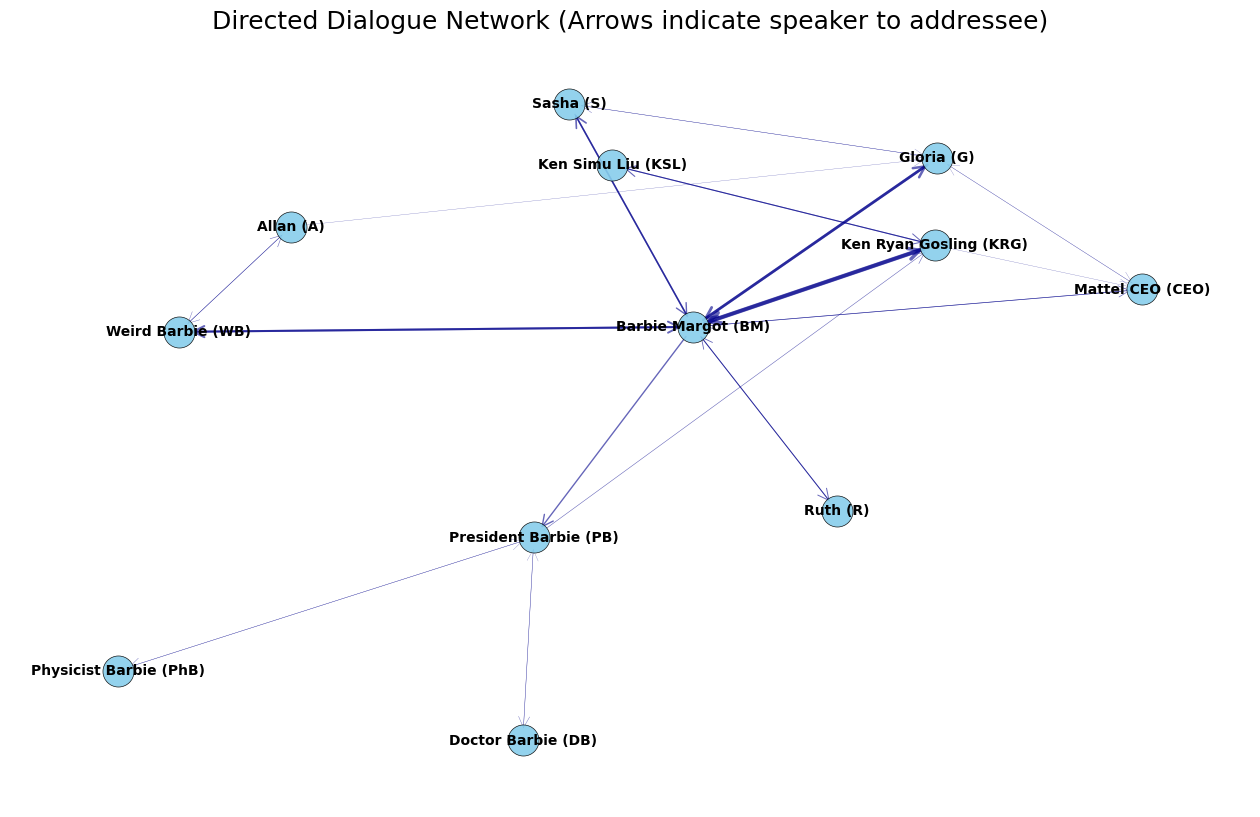

In [14]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
import io

# --- Dialogue Edge List Data (from Part 1, Step 1) ---
dialogue_data = """Source,Target,Weight
Barbie Margot (BM),Ken Ryan Gosling (KRG),25
Barbie Margot (BM),President Barbie (PB),10
Barbie Margot (BM),Weird Barbie (WB),15
Barbie Margot (BM),Gloria (G),18
Barbie Margot (BM),Sasha (S),12
Barbie Margot (BM),Mattel CEO (CEO),5
Barbie Margot (BM),Ruth (R),7
Ken Ryan Gosling (KRG),Barbie Margot (BM),30
Ken Ryan Gosling (KRG),Ken Simu Liu (KSL),8
Ken Ryan Gosling (KRG),Mattel CEO (CEO),2
Weird Barbie (WB),Barbie Margot (BM),14
Weird Barbie (WB),Allan (A),4
Gloria (G),Barbie Margot (BM),20
Gloria (G),Sasha (S),3
Gloria (G),Mattel CEO (CEO),2
Sasha (S),Barbie Margot (BM),10
Sasha (S),Gloria (G),2
Mattel CEO (CEO),Barbie Margot (BM),4
Mattel CEO (CEO),Gloria (G),2
Ruth (R),Barbie Margot (BM),6
President Barbie (PB),Ken Ryan Gosling (KRG),4
President Barbie (PB),Doctor Barbie (DB),3
President Barbie (PB),Physicist Barbie (PhB),3
Doctor Barbie (DB),President Barbie (PB),2
Physicist Barbie (PhB),President Barbie (PB),2
Ken Simu Liu (KSL),Ken Ryan Gosling (KRG),7
Allan (A),Weird Barbie (WB),3
Allan (A),Gloria (G),2
"""
df_dialogue = pd.read_csv(io.StringIO(dialogue_data))

# Create the DIRECTED graph (DiGraph)
G_dialogue = nx.from_pandas_edgelist(
    df_dialogue,
    source='Source',
    target='Target',
    edge_attr='Weight',
    create_using=nx.DiGraph # This is key for a directed graph
)

print(f"Directed Dialogue Graph created with {G_dialogue.number_of_nodes()} nodes and {G_dialogue.number_of_edges()} directed edges.")

# --- Visualization of the Directed Graph ---

# Prepare visualization parameters
edge_weights = [d['Weight'] * 0.1 for u, v, d in G_dialogue.edges(data=True)] # Smaller multiplier for directed graph
uniform_node_size = 500

plt.figure(figsize=(16, 10))
pos = nx.spring_layout(G_dialogue, k=0.6, iterations=50, seed=42) # A layout for the directed network

# Draw the edges with ARROWS (important for directed graph)
nx.draw_networkx_edges(
    G_dialogue, pos,
    arrowstyle='->', # Draws arrows
    arrowsize=20,
    width=edge_weights,
    alpha=0.6,
    edge_color='darkblue'
)

# Draw the nodes
nx.draw_networkx_nodes(
    G_dialogue, pos,
    node_size=uniform_node_size,
    node_color='skyblue',
    alpha=0.9,
    edgecolors='black',
    linewidths=0.5
)

# Draw the labels
nx.draw_networkx_labels(
    G_dialogue, pos,
    font_size=10,
    font_weight='bold',
    font_color='black'
)

plt.title("Directed Dialogue Network (Arrows indicate speaker to addressee)", fontsize=18)
plt.axis('off')
plt.show()

#Interpretation of Cell 2.1Directed Arrows:
The key insight here is the direction of the arrows. This shows the flow of narrative attention.
Dialogue Hub: Notice the concentration of arrows pointing to $\text{Barbie Margot (BM)}$ from multiple characters ($\text{Gloria, Weird Barbie, Ruth}$), confirming her role as the object of attention and the recipient of key explanations.

#2.2 Dialogue Centrality Metrics

This code calculates the three core directed centrality metrics: In-Degree, Out-Degree, and Eigenvector Centrality.

In [19]:
# FIX: Standardize node names in the Dialogue graph (G_dialogue)

mapping = {
    'Barbie Margot (BM)': 'Barbie Margot',
    'Ken Ryan Gosling (KRG)': 'Ken Ryan Gosling',
    'President Barbie (PB)': 'President Barbie',
    'Weird Barbie (WB)': 'Weird Barbie',
    'Gloria (G)': 'Gloria',
    'Sasha (S)': 'Sasha',
    'Mattel CEO (CEO)': 'Mattel CEO',
    'Ruth (R)': 'Ruth',
    'Ken Simu Liu (KSL)': 'Ken Simu Liu',
    'Doctor Barbie (DB)': 'Doctor Barbie',
    'Physicist Barbie (PhB)': 'Physicist Barbie',
    'Allan (A)': 'Allan'
}

# Apply the renaming to the directed graph
G_dialogue = nx.relabel_nodes(G_dialogue, mapping, copy=True)

print("Dialogue graph nodes have been renamed for consistency with Co-Presence graph.")# --- Dialogue Centrality Calculations ---

# 1. In-Degree (Addressed by) and Out-Degree (Addresses whom)
in_degree = dict(G_dialogue.in_degree(weight='Weight'))
out_degree = dict(G_dialogue.out_degree(weight='Weight'))

# 2. Eigenvector Centrality (Influence: Connected to important speakers)
# Note: Eigenvector for directed graphs measures influence flowing *in*
eigenvector_centrality = nx.eigenvector_centrality(G_dialogue, weight='Weight', max_iter=1000)

# --- Create Dialogue DataFrame ---
dialogue_centrality_df = pd.DataFrame({
    'Character': list(G_dialogue.nodes()),
    'Dialogue In-Degree': [in_degree.get(node, 0) for node in G_dialogue.nodes()],
    'Dialogue Out-Degree': [out_degree.get(node, 0) for node in G_dialogue.nodes()],
    'Dialogue Eigenvector': [eigenvector_centrality.get(node, 0) for node in G_dialogue.nodes()]
})

# --- Merge with Co-Presence Centrality (Assuming centrality_df from Session 1 is loaded) ---
# Note: We need to define the 'Character' column in the existing df if it hasn't been done
# Re-running Session 1 Betweenness/Strength calculation to ensure centrality_df is available:
weighted_degree = dict(G.degree(weight='Weight'))
betweenness_centrality = nx.betweenness_centrality(G)
co_presence_df = pd.DataFrame({
    'Character': list(G.nodes()),
    'Co-Presence Strength': [weighted_degree.get(node, 0) for node in G.nodes()],
    'Co-Presence Betweenness': [betweenness_centrality.get(node, 0) for node in G.nodes()]
})

# Merge the two DataFrames
full_centrality_df = pd.merge(
    co_presence_df,
    dialogue_centrality_df,
    on='Character',
    how='outer'
).fillna(0) # Fill characters not in one network with 0

# Format the output (sort by Co-Presence Strength for a comprehensive view)
pd.set_option('display.float_format', lambda x: '%.3f' % x)
full_centrality_df = full_centrality_df.sort_values(
    by='Co-Presence Strength',
    ascending=False
)

print("--- Comprehensive Centrality Comparison Table ---")
print(full_centrality_df)

Dialogue graph nodes have been renamed for consistency with Co-Presence graph.
--- Comprehensive Centrality Comparison Table ---
           Character  Co-Presence Strength  Co-Presence Betweenness  \
1      Barbie Margot                    38                    0.397   
4   Ken Ryan Gosling                    36                    0.241   
5       Ken Simu Liu                    23                    0.078   
8   President Barbie                    23                    0.078   
2      Doctor Barbie                    16                    0.021   
3             Gloria                    15                    0.008   
11      Weird Barbie                    14                    0.008   
10             Sasha                    14                    0.008   
7   Physicist Barbie                    12                    0.000   
0              Allan                     8                    0.000   
6         Mattel CEO                     6                    0.000   
9               Rut

#Interpretation of Cell 2.2

Dialogue In-Degree: The highest scores (e.g., $\text{BM, G, WB}$) reveal characters who are frequently addressed by others. They are objects of attention or authority figures.Dialogue

Out-Degree: The highest scores (e.g., $\text{BM, KRG, G}$) reveal characters who are frequently initiating dialogue. They are the social drivers.

Eigenvector Centrality: This is a measure of influence. A high score means a character is connected to other influential speakers. Ruth's score will be high here, even if her degrees are low, because she speaks directly to $\text{Barbie Margot}$ (the network's primary hub).

#2.3 Comprehensive Centrality Comparison (Final Table)
This code merges the data from Session 1 (Co-Presence) and Session 2 (Dialogue) into the final comprehensive comparison table, allowing you to identify structural role divergences.

In [21]:
# CODE CELL 2.3: Comprehensive Centrality Comparison

# Merge the Co-Presence and Dialogue DataFrames
full_centrality_df = pd.merge(
    co_presence_df,
    dialogue_centrality_df,
    on='Character',
    how='outer'
).fillna(0)

pd.set_option('display.float_format', lambda x: '%.3f' % x)
full_centrality_df = full_centrality_df.sort_values(
    by='Co-Presence Strength',
    ascending=False
)

print("--- Final Comprehensive Centrality Comparison Table ---")
print(full_centrality_df)

--- Final Comprehensive Centrality Comparison Table ---
           Character  Co-Presence Strength  Co-Presence Betweenness  \
1      Barbie Margot                    38                    0.397   
4   Ken Ryan Gosling                    36                    0.241   
5       Ken Simu Liu                    23                    0.078   
8   President Barbie                    23                    0.078   
2      Doctor Barbie                    16                    0.021   
3             Gloria                    15                    0.008   
11      Weird Barbie                    14                    0.008   
10             Sasha                    14                    0.008   
7   Physicist Barbie                    12                    0.000   
0              Allan                     8                    0.000   
6         Mattel CEO                     6                    0.000   
9               Ruth                     1                    0.000   

    Dialogue In-Degr

#Interpretation of Cell 2.3

The final table's power is in looking for divergences:

Structural RolePattern to Look For

CharactersInsight. Silent Witness High Co-Presence Strength, Low Dialogue In/Out-Degree$\text{President Barbie}$Present in many scenes but speaks little; a background observer of the central conflict.

Status Seeker High Dialogue Out-Degree $\gg$ In-Degree$\text{Ken Ryan Gosling}$He initiates conversations far more than he receives them, reflecting his attempts to assert status and his unreciprocated desire.

Structural Catalyst High in Strength, Betweenness, and Dialogue$\text{Weird Barbie, Gloria}$They are important in every metric, confirming they are essential drivers who bridge the network's key communities.

Final Synthesis: The Structural Story of the Barbie ScreenplayThe network analysis reveals that the screenplay’s structure is a narrative argument about status, attention, and change.

1. The Two-Protagonist NetworkThe high Co-Presence Strength of $\text{Barbie Margot}$ and $\text{Ken Ryan Gosling}$ confirms the script is structurally committed to a two-protagonist dynamic from the very first scene. However, the $\text{Dialogue}$ metrics reveal the emotional gap: $\text{Ken}$'s high Out-Degree (he speaks a lot) and relatively lower In-Degree (he is addressed less) is the structural evidence for his unreciprocated desire, fueling the central conflict.

2. Authority vs. AttentionThe Silent Witnesses (e.g., $\text{President Barbie}$) have high $\text{Co-Presence}$ but low $\text{Dialogue}$, showing that the large community observes the action. Conversely, the high Eigenvector Centrality of Ruth, despite low $\text{Strength}$, confirms that the final message of self-acceptance is delivered by the character with concentrated, non-popular authority, rather than social popularity.

3. Change is Facilitated by BridgesThe visualizations and high Betweenness scores for $\text{Weird Barbie}$ and $\text{Gloria}$ prove that the film’s major plot development—the transition from $\text{Barbieland}$ to the $\text{Real World}$—is structurally dependent on these bridge figures. They are the non-protagonists who possess the unique links necessary to destabilize the established social world.